In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from env import host, user, password, get_db_url
import acquire
pd.set_option('display.max_rows', None)

In [2]:
df = acquire.wrangle_data()
df.head()

,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program
datetime,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26 09:56:02,java-ii,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2,Full Stack Java


# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [8]:
std = df.where(df['cohort_name'] != 'Staff')

In [17]:
df.shape

(847329, 9)

In [15]:
std.isnull().nunique()

endpoint       2
user_id        2
cohort_id      2
cohort_name    2
slack          2
start_date     2
end_date       2
program_id     2
program        2
dtype: int64

In [16]:
std = std.dropna()

In [13]:
df.isnull().nunique()

endpoint       1
user_id        1
cohort_id      1
cohort_name    1
slack          1
start_date     1
end_date       1
program_id     1
program        1
dtype: int64

In [18]:
std.shape

(763298, 9)

In [45]:
std.user_id.value_counts()

53.0     8197
495.0    6451
344.0    5460
570.0    4584
423.0    3804
64.0     3792
555.0    3687
685.0    3522
524.0    3512
581.0    3473
485.0    3268
671.0    3241
314.0    3166
566.0    3163
595.0    3050
760.0    3019
764.0    2975
823.0    2946
323.0    2933
419.0    2877
120.0    2870
794.0    2852
11.0     2735
599.0    2711
127.0    2687
613.0    2685
410.0    2650
531.0    2632
418.0    2598
656.0    2570
437.0    2523
640.0    2472
315.0    2468
186.0    2450
627.0    2439
433.0    2428
748.0    2399
608.0    2387
834.0    2379
277.0    2367
460.0    2322
347.0    2318
668.0    2316
490.0    2312
636.0    2267
20.0     2263
325.0    2248
612.0    2238
662.0    2235
604.0    2221
698.0    2211
457.0    2188
337.0    2183
648.0    2158
614.0    2146
274.0    2146
491.0    2143
475.0    2136
416.0    2121
761.0    2120
330.0    2112
666.0    2103
264.0    2083
692.0    2081
275.0    2076
476.0    2075
304.0    2061
272.0    2044
479.0    2007
197.0    1993
393.0    1990
637.0 

In [39]:
std2 = std2.dropna()

In [41]:
std2.head()

,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program
datetime,,,,,,,,,


In [46]:
std.user_id.value

TypeError: '<' not supported between instances of 'method' and 'int'

In [49]:
id_df = pd.DataFrame(std.user_id.value_counts(dropna=False)).reset_index().\
                rename(columns={'index': 'user_id', 'user_id': 'count'})

In [50]:
id_df.head()

,user_id,count
0,53.0,8197
1,495.0,6451
2,344.0,5460
3,570.0,4584
4,423.0,3804


In [51]:
id_df2 = pd.DataFrame((df.user_id.value_counts(dropna=False))/df.user_id.count()).reset_index().\
                rename(columns={'index': 'user_id', 'user_id': 'proba'})
id_df2.head()

,user_id,proba
0,11,0.021141
1,64,0.019263
2,53,0.014550
3,314,0.009185
4,1,0.008738


In [53]:
id_df = id_df.merge(id_df2, on='user_id')
id_df.head()

,user_id,count,proba
0,53.0,8197,0.014550
1,495.0,6451,0.007613
2,344.0,5460,0.006444
3,570.0,4584,0.005410
4,423.0,3804,0.004489


In [54]:
id_df.set_index('user_id')['count'].sort_values()

user_id
619.0       1
165.0       1
163.0       1
952.0       1
66.0        1
879.0       1
940.0       1
212.0       1
649.0       1
593.0       1
918.0       1
852.0       2
574.0       2
573.0       2
97.0        2
81.0        3
177.0       3
832.0       3
348.0       3
857.0       4
85.0        4
216.0       4
246.0       4
82.0        5
71.0        5
539.0       5
152.0       5
169.0       5
399.0       5
956.0       6
115.0       6
401.0       7
107.0       8
104.0       8
388.0       8
95.0        9
141.0       9
84.0       10
77.0       10
279.0      10
679.0      11
161.0      11
396.0      11
92.0       11
941.0      12
172.0      12
572.0      12
108.0      12
311.0      12
697.0      13
405.0      13
174.0      13
144.0      14
316.0      14
244.0      14
91.0       15
889.0      16
812.0      16
318.0      17
487.0      17
402.0      17
968.0      17
209.0      17
114.0      18
151.0      18
340.0      18
963.0      18
650.0      18
140.0      19
610.0      20
961.0      2

<AxesSubplot:ylabel='user_id'>

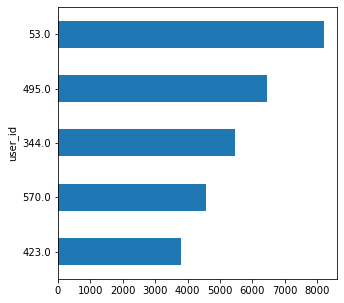

In [55]:
id_df.set_index('user_id')['count'].sort_values().tail(5).plot.barh(figsize=(5,5))

<AxesSubplot:ylabel='user_id'>

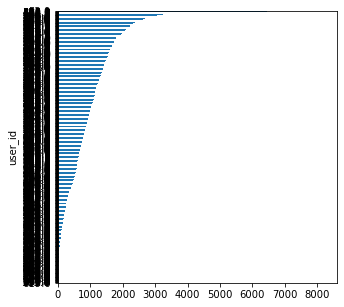

In [56]:
id_df.set_index('user_id')['count'].sort_values().plot.barh(figsize=(5,5))

# 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? 



## Does it appear that any web-scraping is happening? 

## Are there any suspicious IP addresses?